Random Forestta değişkenler best olarak değil de random olarak seçilir. Başarısız olan aağçların katsayılarını 0 lar. Decisison tree gibi bu ağaçların değerlerine bakmaz.

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

#%matplotlib inline
#%matplotlib notebook
plt.rcParams["figure.figsize"] = (10,6)
import warnings
warnings.filterwarnings("ignore")
warnings.warn("this will not show")
pd.set_option('display.float_format', lambda x: '%.3f' % x)

In [2]:
df=pd.read_csv("diabetes.csv")
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.600,0.627,50,1
1,1,85,66,29,0,26.600,0.351,31,0
2,8,183,64,0,0,23.300,0.672,32,1
3,1,89,66,23,94,28.100,0.167,21,0
4,0,137,40,35,168,43.100,2.288,33,1


In [3]:
for i in df.select_dtypes([float, int]).columns:
    if i == "DiabetesPedigreeFunction" and i == "Insulin" :
        Q1 = df[i].quantile(0.25)
        Q3 = df[i].quantile(0.75)
        IQR = Q3-Q1
        alt_sinir = Q1-(2.5*IQR)
        ust_sinir = Q3+(2.5*IQR)
    #print(f"{i} sutununun alt sınır değeri = {alt_sinir}")
    #print(f"{i} sutununun üst sınır değeri = {ust_sinir}")
        aykiri_alt = df[i] < alt_sinir
        aykiri_ust = df[i] > ust_sinir
    #print(i, "tablosunda toplamda =", df[i][aykiri_alt].count(),"aykırı alt veri vardır.")
    #print(i, "tablosunda toplamda =",df[i][aykiri_ust].count(), "aykırı üst veri vardır.")
        df[i][aykiri_alt] = alt_sinir
        df[i][aykiri_ust] = ust_sinir
        
        
    elif  i == "BloodPressure" and i == "BMI" and i == "Age" :
            Q1 = df[i].quantile(0.25)
            Q3 = df[i].quantile(0.75)
            IQR = Q3-Q1
            alt_sinir = Q1-(1.8*IQR)
            ust_sinir = Q3+(1.8*IQR)
    #print(f"{i} sutununun alt sınır değeri = {alt_sinir}")
    #print(f"{i} sutununun üst sınır değeri = {ust_sinir}")
            aykiri_alt = df[i] < alt_sinir
            aykiri_ust = df[i] > ust_sinir
    #print(i, "tablosunda toplamda =", df[i][aykiri_alt].count(),"aykırı alt veri vardır.")
    #print(i, "tablosunda toplamda =",df[i][aykiri_ust].count(), "aykırı üst veri vardır.")
            df[i][aykiri_alt] = alt_sinir
            df[i][aykiri_ust] = ust_sinir
    
    else : 
        Q1 = df[i].quantile(0.25)
        Q3 = df[i].quantile(0.75)
        IQR = Q3-Q1
        alt_sinir = Q1-(1.7*IQR)
        ust_sinir = Q3+(1.7*IQR)
    #print(f"{i} sutununun alt sınır değeri = {alt_sinir}")
    #print(f"{i} sutununun üst sınır değeri = {ust_sinir}")
        aykiri_alt = df[i] < alt_sinir
        aykiri_ust = df[i] > ust_sinir
    #print(i, "tablosunda toplamda =", df[i][aykiri_alt].count(),"aykırı alt veri vardır.")
    #print(i, "tablosunda toplamda =",df[i][aykiri_ust].count(), "aykırı üst veri vardır.")
        df[i][aykiri_alt] = alt_sinir
        df[i][aykiri_ust] = ust_sinir

In [4]:
X=df.drop(["Outcome"], axis=1)
y=df["Outcome"]

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, stratify=y, random_state=42)

In [5]:
from sklearn.metrics import confusion_matrix, classification_report, f1_score, recall_score, precision_score, accuracy_score

def eval_metric(model, X_train, y_train, X_test, y_test):
    y_train_pred = model.predict(X_train)
    y_pred = model.predict(X_test)
    
    print("Test_Set")
    print(confusion_matrix(y_test, y_pred))
    print(classification_report(y_test, y_pred))
    print()
    print("Train_Set")
    print(confusion_matrix(y_train, y_train_pred))
    print(classification_report(y_train, y_train_pred))

In [6]:
from sklearn.ensemble import RandomForestClassifier

rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)
eval_metric(rf_model, X_train, y_train, X_test, y_test)

Test_Set
[[86 14]
 [26 28]]
              precision    recall  f1-score   support

           0       0.77      0.86      0.81       100
           1       0.67      0.52      0.58        54

    accuracy                           0.74       154
   macro avg       0.72      0.69      0.70       154
weighted avg       0.73      0.74      0.73       154


Train_Set
[[400   0]
 [  0 214]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       400
           1       1.00      1.00      1.00       214

    accuracy                           1.00       614
   macro avg       1.00      1.00      1.00       614
weighted avg       1.00      1.00      1.00       614



In [8]:
from sklearn.model_selection import cross_validate

model = RandomForestClassifier(random_state=42 )

scores = cross_validate(model, X_test, y_test, scoring = ['precision','recall','f1','accuracy'], cv = 10)
df_scores = pd.DataFrame(scores, index = range(1, 11))
df_scores.mean()[2:]

test_precision   0.707
test_recall      0.497
test_f1          0.543
test_accuracy    0.728
dtype: float64

In [10]:
rf_model.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': 42,
 'verbose': 0,
 'warm_start': False}

In [11]:
rf_feature_imp = pd.DataFrame(index = X.columns, data = rf_model.feature_importances_,
                              columns = ["Feature Importance"]).sort_values("Feature Importance", ascending = False)
rf_feature_imp

,Feature Importance
Glucose,0.277
BMI,0.159
Age,0.128
DiabetesPedigreeFunction,0.121
BloodPressure,0.089
Pregnancies,0.085
Insulin,0.071
SkinThickness,0.070


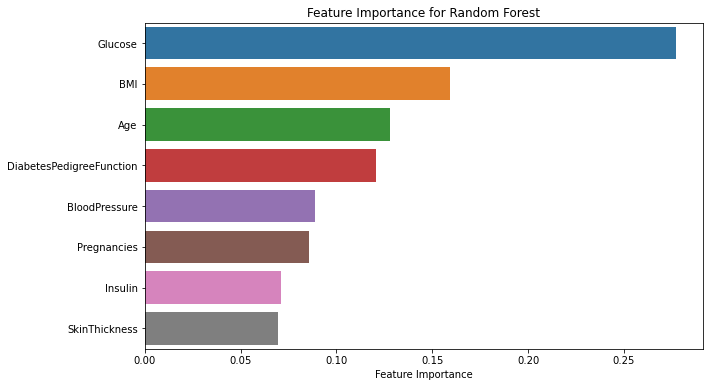

In [12]:
ax = sns.barplot(x=rf_feature_imp["Feature Importance"], y=rf_feature_imp.index)
plt.title("Feature Importance for Random Forest")
plt.show()

In [27]:
from sklearn.model_selection import GridSearchCV

param_grid = {"max_depth": np.arange(3,100)}

model = RandomForestClassifier(class_weight = "balanced", random_state=42)
grid_model = GridSearchCV(estimator=model,
                            param_grid=param_grid,
                            scoring='recall',
                            n_jobs = -1).fit(X_train, y_train)

In [28]:
grid_model.best_params_

{'max_depth': 4}

In [31]:
from sklearn.model_selection import GridSearchCV

param_grid = {"max_features": np.arange(3,100)}

model = RandomForestClassifier(class_weight = "balanced", random_state=42, max_depth=4)
grid_model = GridSearchCV(estimator=model,
                            param_grid=param_grid,
                            scoring='recall',
                            n_jobs = -1).fit(X_train, y_train)

GridSearchCV(estimator=RandomForestClassifier(class_weight='balanced',
                                              max_depth=4, random_state=42),
             n_jobs=-1, param_grid={'max_features': [None, 4]},
             scoring='recall')

In [32]:
grid_model.best_params_

{'max_features': 4}

In [33]:
param_grid = {"min_samples_leaf": np.arange(3,20)}

model = RandomForestClassifier(class_weight = "balanced", random_state=42, max_depth=4, max_features=4)
grid_model = GridSearchCV(estimator=model,
                            param_grid=param_grid,
                            scoring='recall',
                            n_jobs = -1).fit(X_train, y_train)

In [34]:
grid_model.best_params_

{'min_samples_leaf': 14}

In [35]:
param_grid = {"min_samples_split": np.arange(3,50)}

model = RandomForestClassifier(class_weight = "balanced", random_state=42, max_depth=4, max_features=4, min_samples_leaf=14)
grid_model = GridSearchCV(estimator=model,
                            param_grid=param_grid,
                            scoring='recall',
                            n_jobs = -1)

grid_model.fit(X_train, y_train)

GridSearchCV(estimator=RandomForestClassifier(class_weight='balanced',
                                              max_depth=4, max_features=4,
                                              min_samples_leaf=14,
                                              random_state=42),
             n_jobs=-1,
             param_grid={'min_samples_split': array([ 3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19,
       20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36,
       37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49])},
             scoring='recall')

In [36]:
grid_model.best_params_

{'min_samples_split': 48}

In [37]:
eval_metric(grid_model,X_train, y_train, X_test, y_test)

Test_Set
[[77 23]
 [14 40]]
              precision    recall  f1-score   support

           0       0.85      0.77      0.81       100
           1       0.63      0.74      0.68        54

    accuracy                           0.76       154
   macro avg       0.74      0.76      0.75       154
weighted avg       0.77      0.76      0.76       154


Train_Set
[[325  75]
 [ 43 171]]
              precision    recall  f1-score   support

           0       0.88      0.81      0.85       400
           1       0.70      0.80      0.74       214

    accuracy                           0.81       614
   macro avg       0.79      0.81      0.79       614
weighted avg       0.82      0.81      0.81       614



In [38]:
from sklearn.metrics import roc_auc_score, precision_recall_curve, roc_curve, plot_roc_curve, plot_precision_recall_curve

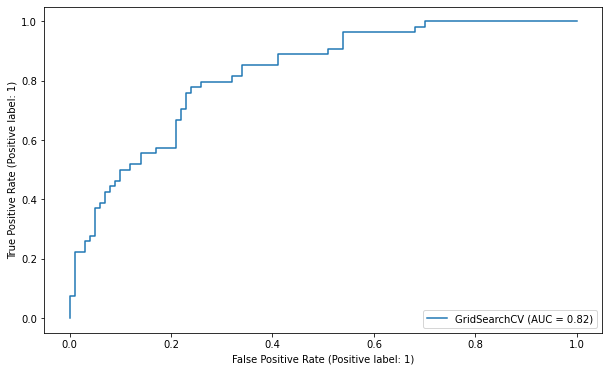

In [39]:
plot_roc_curve(grid_model, X_test, y_test, pos_label=1);

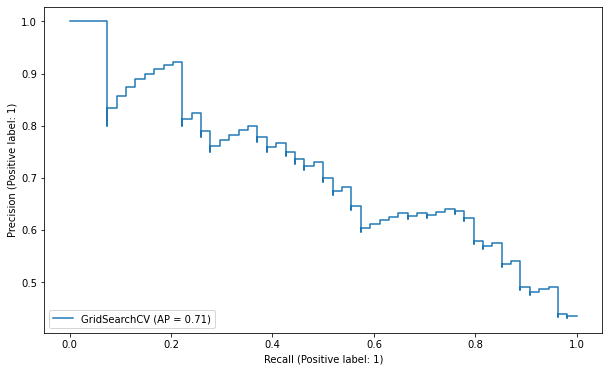

In [40]:
plot_precision_recall_curve(grid_model, X_test, y_test, pos_label=1);

In [41]:
y_pred_proba = rf_model.predict_proba(X_test)
roc_auc_score(y_test, y_pred_proba[:,1])
fp_rate, tp_rate, thresholds = roc_curve(y_test, y_pred_proba[:,1])
optimal_idx = np.argmax(tp_rate - fp_rate) 

optimal_threshold = thresholds[optimal_idx] # en iyi threshold değerimizin olduğu indexi arraye vererek buluruz.
optimal_threshold

0.27

In [42]:
y_pred = pd.Series(grid_model.predict_proba(X_test)[:,1]).apply(lambda x : 1 if x >= 0.24 else 0)

print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[46 54]
 [ 2 52]]
              precision    recall  f1-score   support

           0       0.96      0.46      0.62       100
           1       0.49      0.96      0.65        54

    accuracy                           0.64       154
   macro avg       0.72      0.71      0.64       154
weighted avg       0.79      0.64      0.63       154



In [44]:
y_pred1 = pd.Series(grid_model.predict_proba(X_train)[:,1]).apply(lambda x : 1 if x >= optimal_threshold else 0)

print(confusion_matrix(y_train, y_pred1))
print(classification_report(y_train, y_pred1))

[[192 208]
 [  5 209]]
              precision    recall  f1-score   support

           0       0.97      0.48      0.64       400
           1       0.50      0.98      0.66       214

    accuracy                           0.65       614
   macro avg       0.74      0.73      0.65       614
weighted avg       0.81      0.65      0.65       614



In [45]:
from sklearn.model_selection import StratifiedKFold

def CV(n, est, X, y, optimal_threshold):
    skf = StratifiedKFold(n_splits = n, shuffle = True, random_state = 42)
    acc_scores = []
    pre_scores = []
    rec_scores = []
    f1_scores  = []
    
    X = X.reset_index(drop=True)
    y = y.reset_index(drop=True)
    # for ile manuel olarak cross validation train ve test verilerini seçiyoruz.
    for train_index, test_index in skf.split(X, y):
        
        X_train = X.loc[train_index]
        y_train = y.loc[train_index]
        X_test = X.loc[test_index]
        y_test = y.loc[test_index]
        
        
        est = est
        est.fit(X_train, y_train)
        y_pred = est.predict(X_test)
        y_pred_proba = est.predict_proba(X_test)
             
        y_pred2 = pd.Series(y_pred_proba[:,1]).apply(lambda x : 1 if x >= optimal_threshold else 0)
        
        acc_scores.append(accuracy_score(y_test, y_pred2))
        pre_scores.append(precision_score(y_test, y_pred2, pos_label=1))
        rec_scores.append(recall_score(y_test, y_pred2, pos_label=1))
        f1_scores.append(f1_score(y_test, y_pred2, pos_label=1))
    
    # aldığımız her skoru yukarıda tanımlanan boş listeye atıyoruz. 
    print(f'Accuracy {np.mean(acc_scores)*100:>10,.2f}%  std {np.std(acc_scores)*100:.2f}%') 
    print(f'Precision-1 {np.mean(pre_scores)*100:>7,.2f}%  std {np.std(pre_scores)*100:.2f}%')
    print(f'Recall-1 {np.mean(rec_scores)*100:>10,.2f}%  std {np.std(rec_scores)*100:.2f}%')
    print(f'F1_score-1 {np.mean(f1_scores)*100:>8,.2f}%  std {np.std(f1_scores)*100:.2f}%')

In [46]:
model = RandomForestClassifier(class_weight = "balanced", random_state=42, max_depth=4, max_features=4, 
                               min_samples_leaf=14, min_samples_split= 48)

model.fit(X, y)

RandomForestClassifier(class_weight='balanced', max_depth=4, max_features=4,
                       min_samples_leaf=14, min_samples_split=48,
                       random_state=42)

In [47]:
prediction = pd.Series(model.predict_proba(X)[:,1]).apply(lambda x : 1 if x >= optimal_threshold else 0)
print(confusion_matrix(y, prediction))
print(classification_report(y, prediction))

[[240 260]
 [  5 263]]
              precision    recall  f1-score   support

           0       0.98      0.48      0.64       500
           1       0.50      0.98      0.66       268

    accuracy                           0.65       768
   macro avg       0.74      0.73      0.65       768
weighted avg       0.81      0.65      0.65       768



In [48]:
CV(10, model, pd.DataFrame(X), y, 0.2)

Accuracy      55.06%  std 4.65%
Precision-1   43.78%  std 2.69%
Recall-1      98.52%  std 1.81%
F1_score-1    60.57%  std 2.62%
